# Aniket Gupta | Data Science | The Sparks Foundation

# Task-3:
## Perform A Exploratory Data Analysis On SampleSuperStore

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv("Data/SampleSuperstore.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [18]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [28]:
df.head(0)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


<AxesSubplot:xlabel='Segment', ylabel='count'>

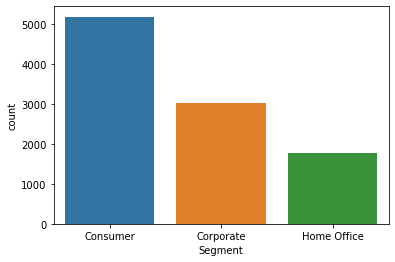

In [90]:
sns.countplot(x='Segment', data=df)

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Profit', ylabel='Density'>

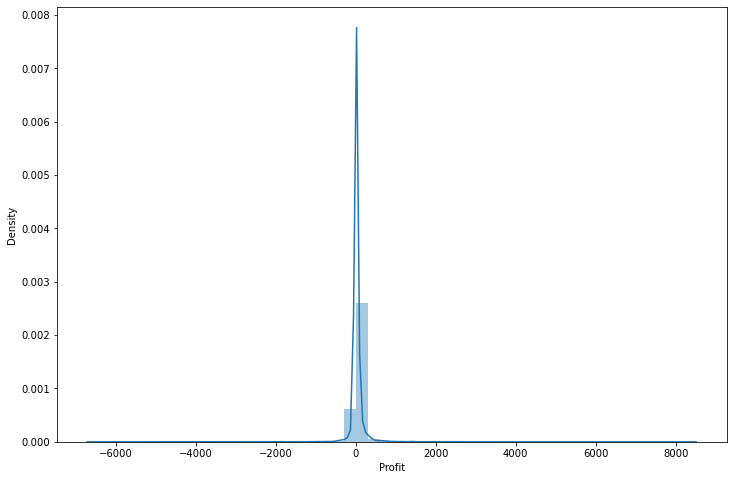

In [107]:
plt.figure(figsize=(12,8))
sns.distplot(df["Profit"],bins=50,)

In [38]:
label = ["Ship Mode","Segment","Country","City","State","Region","Category","Sub-Category"]

In [39]:
label

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [48]:
lst = []
for a in label:
    new = df[a].nunique()
    lst.append(new)

In [49]:
nuni = pd.DataFrame({"Labels":label,"Unique":lst})

In [50]:
nuni

,Labels,Unique
0,Ship Mode,4
1,Segment,3
2,Country,1
3,City,531
4,State,49
5,Region,4
6,Category,3
7,Sub-Category,17


In [70]:
dfn = df.copy()
dfn.drop("Postal Code",axis=1,inplace=True)

In [100]:
Segments = pd.DataFrame(dfn.groupby("Segment").sum())

In [101]:
Segments

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.161401e+06,19521,820.91,134119.2092
Corporate,7.061464e+05,11608,477.85,91979.1340
Home Office,4.296531e+05,6744,262.33,60298.6785


In [75]:
Categories = dfn.groupby("Category")

In [59]:
regions = df.groupby("Region")
regions.mean()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,65340.572536,215.772661,3.779595,0.240353,17.092709
East,17616.466994,238.336110,3.728230,0.145365,32.135808
South,34490.772840,241.803645,3.832716,0.147253,28.857673
West,91707.696534,226.493233,3.829535,0.109335,33.849032


In [60]:
shipmode = df.groupby("Ship Mode")

In [61]:
shipmode.mean()

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,54765.611834,228.497024,3.701560,0.164610,31.839948
Same Day,57536.082873,236.396179,3.609576,0.152394,29.266591
Second Class,55626.009254,236.089239,3.816452,0.138895,29.535545
Standard Class,54944.447051,227.583067,3.819873,0.160023,27.494770
